# VERİ ÖN İŞLEME

# 1. Kütüphanelerin içe aktarılması


In [1]:
import numpy as np #lineer cebir
import pandas as pd #veri işleme, csv okuma
import matplotlib.pyplot as plt #veri görselleştirme
import seaborn as sns #istatisiksel veri görselleştirme
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

# 2. Veri Kümesini içe aktarma

In [2]:
data = 'Live.csv'
df = pd.read_csv(data)

# 3. (EDA) Keşifsel Veri Analizi

Veri kümesinin şekli:

In [3]:
df.shape

(7050, 16)

Veri kümesinin önizlemesi:

In [4]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


Veri kümesinin özet bilgisi:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

Eksik değerler:

In [6]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

`df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)` ifadesinde, `axis=1` parametresi şu anlamlara gelir:

- **`axis=1`**: Bu, işlemin sütunlar üzerinde yapılacağını belirtir. Pandas'ta, `axis` parametresi iki farklı ekseni temsil eder:
  - **`axis=0`**: Satırlar üzerinde işlem yapar.
  - **`axis=1`**: Sütunlar üzerinde işlem yapar.

Bu örnekte, `axis=1` kullanarak belirtilen sütunları (`Column1`, `Column2`, `Column3`, `Column4`) veri çerçevesinden kaldırıyorsunuz.

Ayrıca, `inplace=True` parametresi, değişikliklerin orijinal veri çerçevesinde yapılmasını ve yeni bir veri çerçevesi oluşturulmadan bu değişikliklerin uygulanmasını sağlar. Eğer `inplace=False` (veya `inplace` parametresi belirtilmemişse) olsaydı, `drop` metodu yeni bir veri çerçevesi döndürürdü ve orijinal veri çerçevesinde hiçbir değişiklik yapmazdı.

In [7]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


Veri kümesinde 3 karakter değişkeni (tipi = object) ve geri kalan 9 sayısal değişken (tipi = int64) bulunmaktadır.

In [9]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


3 tane kategorik verimiz var. Bunları tek tek keşfedeceğiz.

## status_id değişkeninin analizi

 `status_id` sütununda farklı sosyal medya gönderilerinin ID'leri varsa, bu kod çalıştırıldığında o gönderilerin benzersiz ID'lerinin bir listesi elde edilir. Bu sayede, hangi gönderilerin kaç kez tekrarlandığını veya hangi ID'lerin veri setinde yer aldığını görebilirsiniz.

In [10]:
df['status_id'].unique()


array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [11]:
df['status_id'].nunique()

6997

`status_id` değişkeninde 6997 farklı etiket olduğunu görüyoruz. Veri setindeki toplam örnek sayısı 7050. Yani, her bir örnek için yaklaşık olarak benzersiz bir tanımlayıcı görevi görüyor. Bu nedenle, bu değişkeni kullanmayacağız. Dolayısıyla, bunu çıkartacağız.


In [12]:
df['status_published'].nunique()

6913

Yine, `status_published` değişkeninde 6913 farklı etiket olduğunu görüyoruz. Veri setindeki toplam örnek sayısı 7050. Yani, bu da her bir örnek için yaklaşık olarak benzersiz bir tanımlayıcı. Bu nedenle, bu değişkeni de kullanmayacağız. Dolayısıyla, bunu da çıkartacağım.

In [13]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [14]:
df['status_type'].nunique()

4

`status_type`'da 4 kategori var.


`status_id` ve `status_published`'i veri setimizden kaldıralım.

In [15]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)


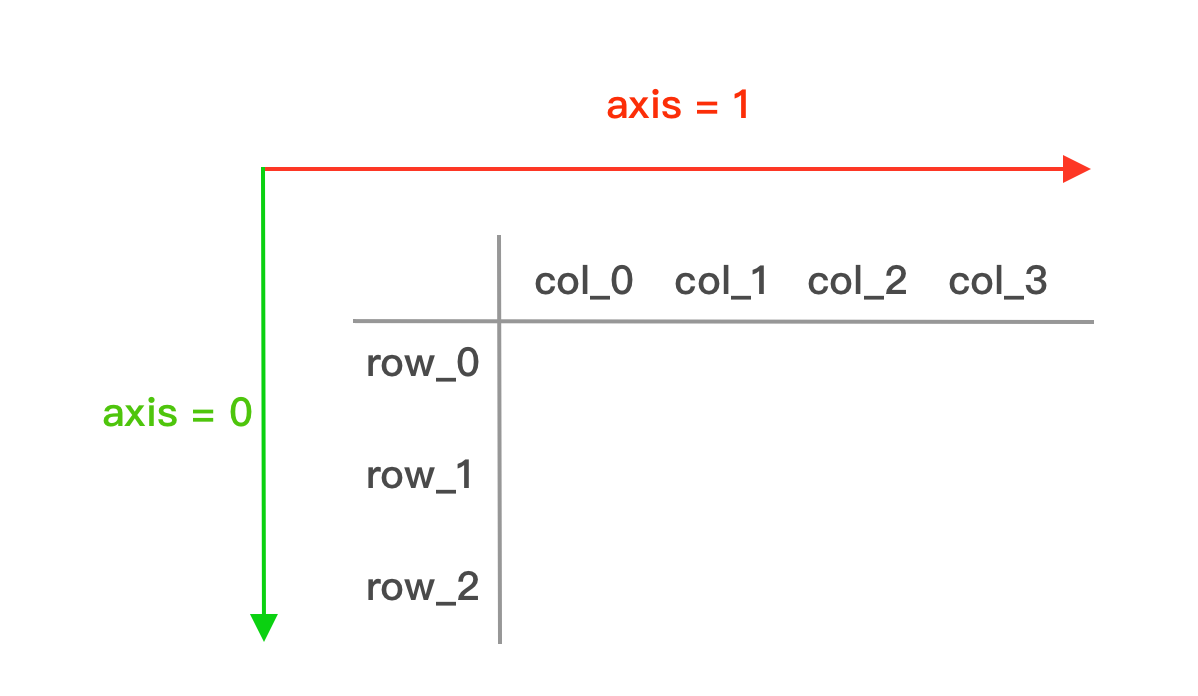

Mevcut veriyi gözden geçirelim:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


Verilerin önizlemesini tekrar görelim:

In [17]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


`status_type` değişkeninin tam sayı olmadığını görüyoruz. Bunu ileriki adımlarda tam sayıya çevireceğiz.

# 4. Özellik vektörünü ve hedef değişkeni tanımlama


- **Özellik vektörü (feature vector)**: Modelin tahmin yapmak için kullandığı bağımsız değişkenler veya özellikler kümesidir.
- **Hedef değişken (target variable)**: Modelin tahmin etmeye çalıştığı bağımlı değişkendir.

In [18]:
X = df

y = df['status_type']


# 5. Sayısal olmayan sınıftaki değerleri numerik hale getirme

`LabelEncoder` sınıfı, Scikit-learn kütüphanesindeki `sklearn.preprocessing` modülünden bir araçtır ve genellikle etiketlerin sayısal formatlara dönüştürülmesi için kullanılır. Bu, makine öğrenimi modelleri için gerekli bir adımdır çünkü birçok model yalnızca sayısal verilerle çalışabilir.

### **LabelEncoder Kullanım Amacı:**

- **Kategorik Verilerin Sayısallaştırılması**: Etiketlerin veya kategorik verilerin sayısal formata dönüştürülmesi, makine öğrenimi algoritmalarının bu verilerle çalışmasını sağlar. Örneğin, "kedi", "köpek", "kuş" gibi kategoriler, `LabelEncoder` kullanılarak 0, 1, 2 gibi sayılara dönüştürülebilir.


### **Fonksiyonlar:**

1. **`fit`**: Etiketlerin benzersiz değerlerini öğrenir.
   ```python
   le.fit(labels)
   ```

2. **`transform`**: Öğrenilen etiketlere göre verileri sayısal formata dönüştürür.
   ```python
   encoded_labels = le.transform(labels)
   ```

3. **`fit_transform`**: Hem `fit` hem de `transform` işlemlerini tek seferde yapar.
   ```python
   encoded_labels = le.fit_transform(labels)
   ```

4. **`inverse_transform`**: Sayısal etiketleri orijinal kategorik değerlere geri dönüştürür.
   ```python
   original_labels = le.inverse_transform(encoded_labels)
   ```


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

#fit ile model uyumlaması yaptığımız için sadece transform yapmamız yeterli
y = le.transform(y)

**Uyarı** : `LabelEncoder` bir veri çerçevesinin tamamını değil, sadece bir sütunu almalıdır. 

`LabelEncoder` kullanırken sadece `transform` metodunu kullanmak, `fit_transform` metodunun gerçekleştirdiği işlemin yalnızca dönüşüm kısmını yapar. Aradaki farkları daha iyi anlamak için iki metodun ne yaptığını inceleyelim:

### **`fit_transform` vs. `transform`**

- **`fit_transform`**: Bu metod, hem `fit` hem de `transform` adımlarını aynı anda gerçekleştirir. Öncelikle `fit` işlemiyle veri üzerindeki kategorileri öğrenir ve her kategoriye bir sayısal etiket atar. Ardından, `transform` işlemiyle bu sayısal etiketleri veri kümesindeki kategorilere uygular. 

  ```python
  le = LabelEncoder()
  encoded_labels = le.fit_transform(labels)
  ```
  Bu kod, `labels` içindeki kategorileri öğrenir ve bu kategorilere sayısal değerler atar, sonuç olarak sayısal etiketleri döndürür.

- **`transform`**: Bu metod yalnızca `transform` işlemini gerçekleştirir. Bu metod, verilerin önceden öğrenilmiş (fit edilmiş) etiketlerle dönüştürülmesi için kullanılır. Yani, `transform` metodunu kullanmadan önce `fit` metodunu çağırmanız gerekir. `fit` metodu, `LabelEncoder`'ın veri setindeki kategorileri öğrenmesini sağlar ve bu öğrenme bilgisi `transform` metoduna uygulanır.

  ```python
  le = LabelEncoder()
  le.fit(labels)  # Kategorileri öğrenir
  encoded_labels = le.transform(labels)  # Önceden öğrenilen etiketlerle dönüşüm yapar
  ```

X'in özetini görüntüleyelim:

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


Veriyi önizleyelim:

In [21]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


# 6. Öznitelik Ölçekleme (Feature Scaling)

**Feature Scaling** (Özellik Ölçekleme), makine öğrenmesi ve veri analizi sürecinde veri setindeki özelliklerin (veya özniteliklerin) ölçeklerinin düzenlenmesini ifade eder. Bu işlem, verilerin aynı ölçek aralığında olmasını sağlar ve bazı algoritmaların daha iyi performans göstermesine yardımcı olabilir. Özellikle, farklı ölçeklerdeki özelliklerin aynı model üzerinde kullanılmasında ortaya çıkabilecek sorunları önler.

### **Özellik Ölçekleme Yöntemleri:**

1. **Min-Max Ölçekleme (Normalization)**:
   - **Amaç**: Verileri belirli bir aralık (genellikle 0 ile 1) içine sıkıştırır.
   - **Formül**: 
     \[
     x_{\text{scaled}} = \frac{x - \text{min}}{\text{max} - \text{min}}
     \]
   - **Kullanım**: Özellikle özelliklerin belirli bir aralık içinde olması gereken durumlarda kullanılır.
   - **Örnek**: Eğer bir özelliğin minimum değeri 10 ve maksimum değeri 100 ise, bu özelliği 0 ile 1 arasına dönüştürür.

2. **Z-Score Standartlaştırma (Standardization)**:
   - **Amaç**: Özelliklerin ortalama değerini 0 ve standart sapmasını 1 yapar. Bu, verileri z-skorlarına dönüştürür.
   - **Formül**:
     \[
     x_{\text{scaled}} = \frac{x - \mu}{\sigma}
     \]
     Burada \(\mu\) ortalama ve \(\sigma\) standart sapmadır.
   - **Kullanım**: Özellikle normal dağılım varsayımına dayanan algoritmalarda kullanılır. Özelliklerin farklı varyanslara sahip olduğu durumlarda faydalıdır.

3. **Robust Scaling**:
   - **Amaç**: Özelliklerin medyanını 0 yapar ve interquartile range (IQR) kullanarak ölçekler.
   - **Formül**:
     \[
     x_{\text{scaled}} = \frac{x - \text{medyan}}{\text{IQR}}
     \]
   - **Kullanım**: Aykırı değerlere karşı dayanıklıdır ve medyan ile IQR kullanarak ölçekleme yapar.

### **Özellik Ölçeklemenin Önemi:**

1. **Model Performansı**: Bazı algoritmalar, özellikle mesafe tabanlı algoritmalar (örneğin, K-Nearest Neighbors) ve optimizasyon tabanlı algoritmalar (örneğin, Gradient Descent), özelliklerin aynı ölçek aralığında olmasını gerektirir. Ölçekleme, bu algoritmaların performansını artırabilir.

2. **Ağırlıkların Etkisi**: Özelliklerin farklı ölçeklerde olması, bazı özelliklerin model üzerinde diğerlerinden daha fazla etki etmesine neden olabilir. Özellik ölçekleme, bu sorunu önler.

3. **Model Konverjansı**: Özelliklerin aynı ölçeklerde olması, modelin daha hızlı ve stabil bir şekilde eğitilmesine yardımcı olabilir.

### **Türkçede Kullanımı:**

- **Özellik Ölçekleme**: Makine öğrenmesi ve veri analizi süreçlerinde, verilerin ölçeklerini ayarlamak için kullanılan terimdir.
- **Örnek**: "Veri setimizdeki özellikleri ölçekledik" veya "Modelin doğruluğunu artırmak için özellik ölçekleme uyguladık."

Bu yöntemler, veriler üzerinde çeşitli dönüşümler yaparak makine öğrenmesi modelinin performansını ve doğruluğunu artırabilir. Özellikle, farklı ölçeklerdeki verilerle çalışan modellerde, bu işlemler oldukça faydalıdır.

In [22]:
cols = X.columns


In [23]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X = mms.fit_transform(X)

In [24]:
X = pd.DataFrame(X, columns = [cols])

`pandas` kütüphanesinin `DataFrame` sınıfını (class) çağırdık.

In [25]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


Görüldüğü gibi veri setimizdeki değerler 0 ile 1 arasında ölçeklenmiş oldu.

# MODEL OLUŞTURMA

# 7. K-Means Kümeleme ile İki Küme Oluşturma

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

# K-Means Model Parametreleri Çalışması


In [27]:
kmeans.cluster_centers_


array([[9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03],
       [3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03]])

K-Means algoritması, verileri kümelere ayırırken her kümenin ortasında bir merkez noktası belirler. İki kümenin merkez noktaları:K-Means algoritması, verileri kümelere ayırırken her kümenin ortasında bir merkez noktası belirler. İşte iki kümenin merkez aşağıdaki yukarıdaki gibidir:


1. **İlk Kümenin Merkezi (Centroid):**
   - \([0.954921576, 0.0646330441, 0.0267028654, 0.0293171709, 0.0571231462, 0.0471007076, 0.00818581889, 0.00965207685, 0.00804219428, 0.00719501847]\)

2. **İkinci Kümenin Merkezi (Centroid):**
   - \([0.328506857, 0.0390710874, 0.000754854864, 0.000753667113, 0.0385438884, 0.00217448568, 0.00243721364, 0.0012003976, 0.00275348016, 0.00145313276]\)

Bu merkezler, her bir kümenin ortalama özellik değerlerini temsil eder. Kümelerin her bir özelliği için bu değerler, o özelliğin kümeye ait veriler arasında ortalama değerini gösterir.


**Inertia (İçsel Tutarlılık):**
Inertia, kümelerin ne kadar iyi ayrıldığını ölçen bir değerdir. Düşük inertia, kümelerin iyi ayrıldığını ve verilerin daha düzenli olduğunu gösterir. Bu, kümelerin içindeki verilerin birbirine ne kadar yakın olduğunu ölçer. Inertia'nın değeri ne kadar düşükse, kümeler o kadar iyi oluşturulmuş demektir.


**Yüksek Boyutlu Veriler:**
Eğer veriler çok fazla özelliğe sahipse (yani, yüksek boyutlu verilerse), uzaklıklar çok büyük olabilir. Bu, verileri kümelere ayırmayı zorlaştırır. Bu problemi hafifletmek için, **PCA** gibi boyut indirgeme yöntemleri kullanarak veriyi daha küçük bir boyutta işleyebiliriz. Bu, işlemleri hızlandırabilir ve daha iyi sonuçlar verebilir.


In [28]:
kmeans.inertia_


237.75726404419535

- **Model Inertia**: 237.75

**Düşük Inertia Daha İyi:**
Kümeleme modelimizin inertia değeri oldukça yüksek. Bu, kümelerin verileri iyi bir şekilde ayırmadığı anlamına gelir. Yani, bu model verilerimiz için pek uygun değil.


KMeans algoritması, merkezleri seçerken amacı, inertia’yı yani iç-küme kareler toplamını minimize etmektir. Bu, kümelerin içindeki verilerin ne kadar sıkı bir şekilde toplandığını gösterir ve daha düşük bir inertia, kümelerin daha uyumlu olduğunu ifade eder.

# 8. Modelin sınıflandırma (classification) kalitesini kontrol etme


In [29]:
labels = kmeans.labels_

#kaç örneğin doğru etiketlendiğini kontrol et
correct_labels = sum(y == labels)

print("%d örnekten %d doğru etiketlendi." % (y.size,correct_labels))

7050 örnekten 4288 doğru etiketlendi.


In [30]:
print('Doğruluk (accuracy) skoru: {0:0.2f}'.format(correct_labels/float(y.size)))


Doğruluk (accuracy) skoru: 0.61


Modelimizle, denetimsiz bir modelle %61 oranında orta seviye bir sınıflandırma doğruluğu elde ettik.


# 9. En uygun küme sayısını bulmak için dirsek yöntemini kullanma

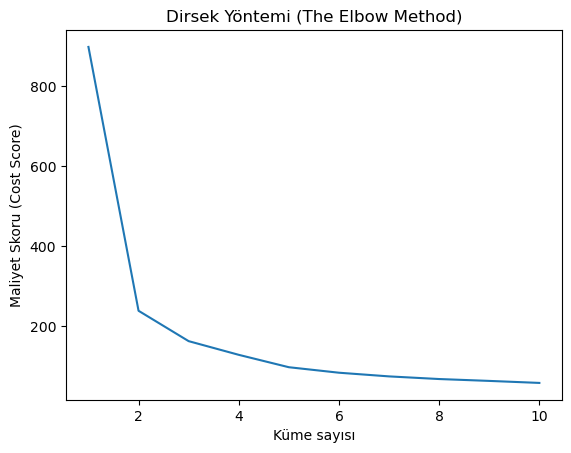

In [31]:
from sklearn.cluster import KMeans
internia = []

#1 kümeden 10 kümeye kadar inceleme yapacağız:

for i in range (1,11):
    kmeans = KMeans(
    n_clusters=i,          # Verileri 3 kümeye ayıracağız
    init='k-means++',      # Küme merkezlerini en iyi şekilde başlatacağız
    max_iter=300,          # Algoritma en fazla 300 kez dönecek
    n_init=10,             # 10 farklı başlangıç noktası deneyeceğiz
    random_state=0         # Aynı sonuçları almak için rastgeleliği kontrol edeceğiz
)
    kmeans.fit(X)
    internia.append(kmeans.inertia_)

plt.plot(range(1,11), internia)
plt.title('Dirsek Yöntemi (The Elbow Method)')
plt.xlabel('Küme sayısı')
plt.ylabel('Maliyet Skoru (Cost Score)')
plt.show()


Bu grafikte, bir noktada karışıklık (distortion) birdenbire düşer ve bu noktayı "dirsek noktası" olarak adlandırırız. Bu, balonları en iyi şekilde organize edebileceğimiz grup sayısını bulmamıza yardımcı olur.

Dirsek noktası olan 2 için modelimizi uygulayalım:

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 0)

kmeans.fit(X)

labels = kmeans.labels_

#accuracy skoru için doğru label'ları bulalım
correct_labels = sum (y == labels)

print("%d örnekten %d örnek doğru etiketlendi." % (correct_labels, y.size))

print('Accuracy score : {0:0.2f}' . format(correct_labels/float(y.size)))

4288 örnekten 7050 örnek doğru etiketlendi.
Accuracy score : 0.61


3 için de deneyeceğim, bakalım doğruluk daha mı yüksek gelecek.

In [40]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.cluster import KMeans

kmeans =KMeans(n_clusters = 3, random_state = 0)

kmeans.fit(X)

labels =kmeans.labels_

correct_labels = sum(y == labels)

acc = correct_labels/y.size

print(acc)

0.5767375886524823


Görüldüğü gibi daha düşük bir doğruluk değerine ulaştık.

# 10. Sonuç

* Bu projede en yaygın denetimsiz öğrenme tekniği olan K-Means Clustering'i kullandık.

* Dirsek değerini 2 olarak bulduk, dolayısıyla n_clusters'i ilk olarak 2 için denedik

* 0.61 doğruluk değerine ulaştık.

* Bir de 3 için deneyelim dedik fakat biraz daha düşük bir accuracy skoruna ulaştık.

# 11. Referans:


https://www.kaggle.com/code/prashant111/k-means-clustering-with-python/notebook#6.-Import-libraries-